Load basic packages

In [1]:
#
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Define two functions for visualization

In [2]:
#
def plot_predictions(clf, limit, axes):
    '''
    Plot the decision function and prediction of a classifier as contour figure
    '''
    x0s = np.linspace(limit[0], limit[1], 100)
    x1s = np.linspace(limit[2], limit[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    axes.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    axes.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

In [3]:
#
def plot_dataset(X, y, limit, axes):
    '''
    Draw scatter plots for negative and positive classes.
    '''
    axes.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    axes.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    axes.axis(limit)
    axes.grid(True, which='both')
    axes.set_xlabel(r"$x_1$", fontsize=20)
    axes.set_ylabel(r"$x_2$", fontsize=20, rotation=0)

# Linear SVM Classification

Run next cell to create training data.

In [4]:
#
from sklearn import datasets
iris = datasets.load_iris()
X = iris["data"][:, [2, 3]] # petal length and petal width
y = (iris["target"] == 2) # virginica

Now build pipeline svm_clf that 
1. Normalize data
2. Build a SVM classifier by C=1 and loss='hinge'

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [6]:
svm_clf = Pipeline([('Nomalize', StandardScaler()), ('SVM', LinearSVC(C=1, loss='hinge'))])

In [7]:
svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('Nomalize', StandardScaler(copy=True, with_mean=True, with_std=True)), ('SVM', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

Fit svm_clf and predict at [5.5, 1.7]

In [8]:
svm_clf.predict([[5.5, 1.7]])

array([ True])

# Nonlinear SVM Classification

Run next cell to generate moon data

In [9]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

Visualize moon data by the function of plot_datases. 

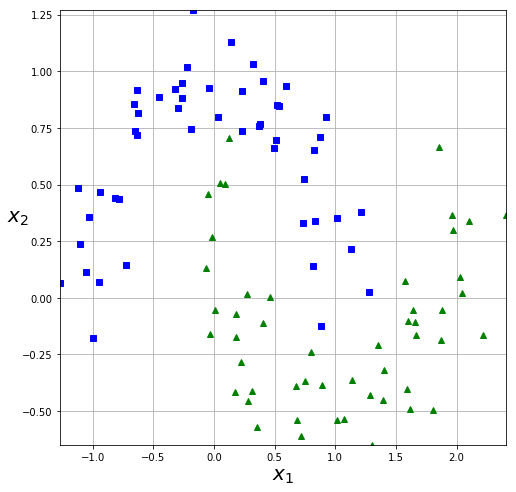

In [10]:
limit = [X[:, 0].min(), X[:, 0].max(), X[:, 1].min(), X[:, 1].max()]
figure, ax = plt.subplots(1, 1, figsize=(8, 8))
plot_dataset(X, y, limit, ax)

Fit a pipeline that normalize X and fit a SVM classifier by polynomial kernel. The degree of this kernel is 3 and inverse penalty coefficient is 5 and coef0 is 1.

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [12]:
svm_pipe = Pipeline([('normalize', StandardScaler()), ('svm', SVC(kernel='poly', degree=3, C=5.0, coef0=1))])
svm_pipe.fit(X, y)

Pipeline(memory=None,
     steps=[('normalize', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm', SVC(C=5.0, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

Fit another SVM with degree at 10

In [13]:
svm_pipe_10 = Pipeline([('normalize', StandardScaler()), ('svm', SVC(kernel='poly', degree=10, C=5.0, coef0=1))])
svm_pipe_10.fit(X, y)

Pipeline(memory=None,
     steps=[('normalize', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm', SVC(C=5.0, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=10, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

Now visualize these two models above by the function of plot_predictions and plot_datasets

Text(0.5,1,'Degree=10')

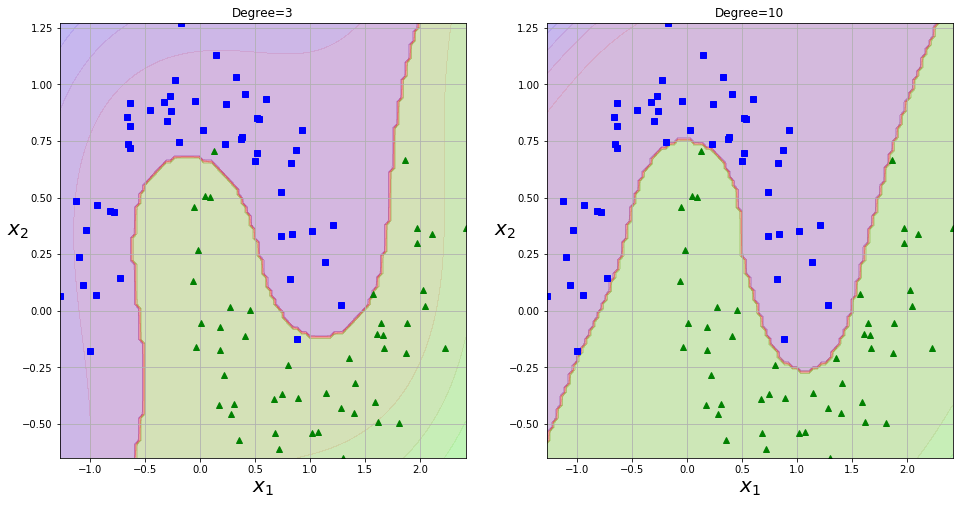

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
plot_predictions(svm_pipe, limit, ax[0])
plot_dataset(X, y, limit, ax[0])
ax[0].set_title('Degree=3')
plot_predictions(svm_pipe_10, limit, ax[1])
plot_dataset(X, y, limit, ax[1])
ax[1].set_title('Degree=10')

Build 4 SVC by RBF kernel at different hyperparameters: gamma=[0.1, 0.1, 5, 5], C = [0.001, 1000, 0.001, 1000]. Then visualize their performance by calling function plot_predictions and plot_datasets. Here higher gamma means higher non-linearity so overfitting is prone to happen happen; and higher C means weak regularization so overfitting is prone to happen.

In [15]:
gamma_list = [0.1, 0.1, 5, 5]
C_list = [0.001, 1000, 0.001, 1000]

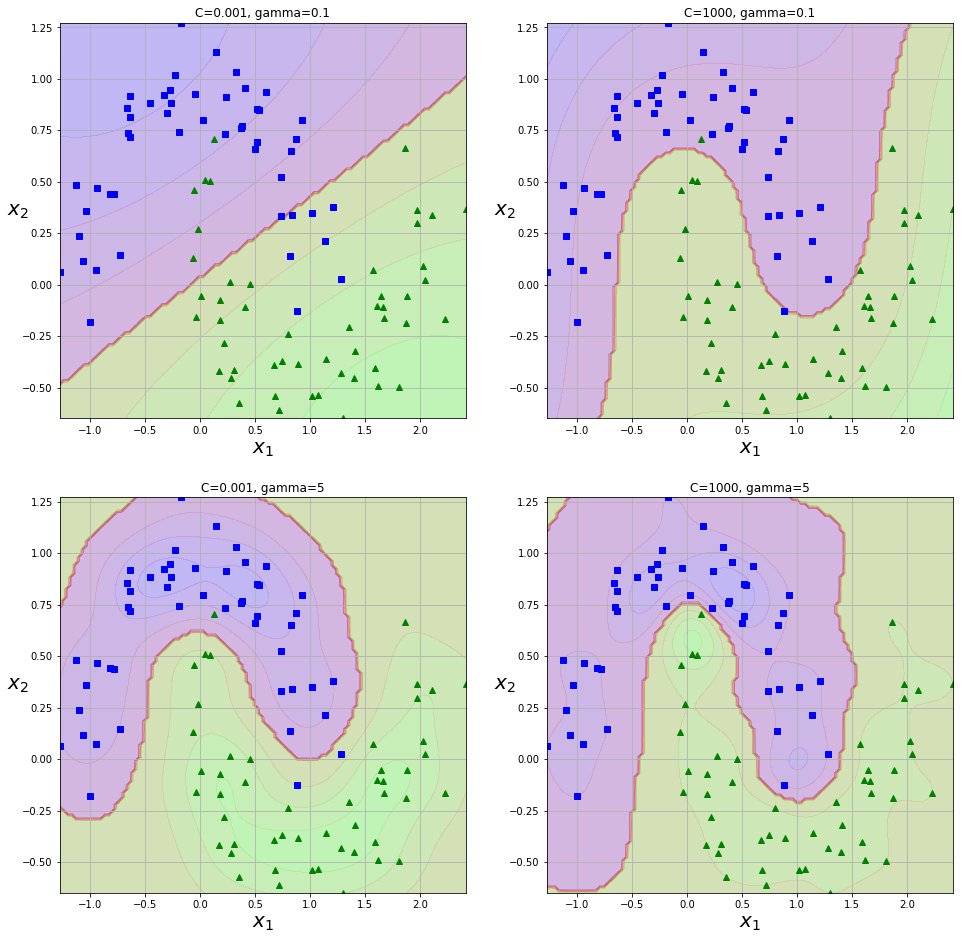

In [16]:
fig, ax = plt.subplots(2, 2, figsize=(16, 16))
ax = ax.ravel()
for (gamma, C, idx) in zip(gamma_list, C_list, range(4)):
    svm_pipe = Pipeline([('normalize', StandardScaler()), ('svm', SVC(C=C, gamma=gamma))])
    svm_pipe.fit(X, y)
    plot_predictions(svm_pipe, limit, ax[idx])
    plot_dataset(X, y, limit, ax[idx])
    ax[idx].set_title('C={}, gamma={}'.format(C, gamma))

# SVM Regression

Run next cell to generate synthetic data

In [17]:
#
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3*X + np.random.randn(m, 1)).ravel()

Fit a linear SVR model and visualize the result.

In [18]:
from sklearn.svm import LinearSVR

In [19]:
reg_svm = LinearSVR()
reg_svm.fit(X, y)

LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0)

Text(0,0.5,'y')

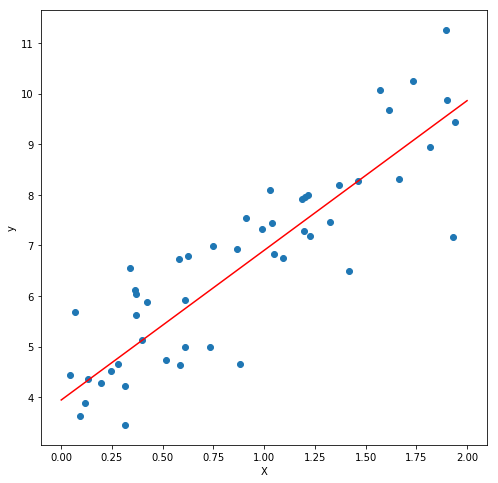

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
plt.scatter(X.ravel(), y)
X_new = np.linspace(0, 2).reshape((-1, 1))
y_pred_new = reg_svm.predict(X_new)
plt.plot(X_new, y_pred_new, 'r')
plt.xlabel('X')
plt.ylabel('y')

Run next cell to generate synthetic data.

In [21]:
#
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

Fit a non-liner SVR model by polynomial kernel and visualize the results. Set degree at 2.

In [22]:
from sklearn.svm import SVR

In [23]:
reg_svm = SVR(kernel='poly', degree=2, C=100)
reg_svm.fit(X, y)

SVR(C=100, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Text(0,0.5,'y')

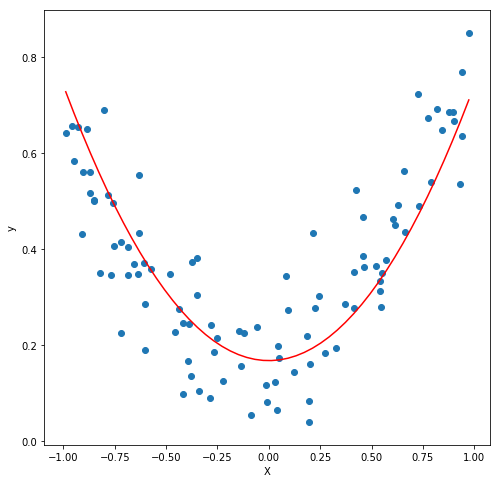

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
plt.scatter(X.ravel(), y)
X_min = X.min()
X_max = X.max()
X_new = np.linspace(X_min, X_max).reshape((-1, 1))
y_pred_new = reg_svm.predict(X_new)
plt.plot(X_new, y_pred_new, 'r')
plt.xlabel('X')
plt.ylabel('y')